# Newton interpolation

In [19]:
from math import pi,sin,cos
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def NewtonInterpol (pts, vals):
    """
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences
    """
    
    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            print ("i =",i, ", j =",j)
            dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd

In [21]:
def Horner (pts, dd, x):
    """
    Horner scheme for polynomial evaluation in Newton basis
    """
    n = len(pts)-1
    sum = dd[n]
    for i in range(n-1, -1, -1):
        sum = sum * (x-pts[i]) + dd[i]
    return sum

In [22]:
pts = [0, pi/4, pi/2]
vals = [sin(p) for p in pts]
dd = NewtonInterpol (pts, vals)
print (dd)

i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 2
[ 0.          0.90031632 -0.33574887]


Checking interpolation points:

In [23]:
for p,v in zip(pts, vals):
    print ("p=",p, "val=", v, "intpol=", Horner(pts, dd, p))

p= 0 val= 0.0 intpol= 0.0
p= 0.7853981633974483 val= 0.7071067811865476 intpol= 0.7071067811865476
p= 1.5707963267948966 val= 1.0 intpol= 1.0


In [24]:
help (NewtonInterpol)

Help on function NewtonInterpol in module __main__:

NewtonInterpol(pts, vals)
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences



# Using extrapolation for numerical differentiation


forward difference quotient
$$
D(h) = \frac{\sin(x+h) - \sin(x)}{h}
$$

In [25]:
def D(x, h): return (sin(x+h)-sin(x)) / h

In [26]:
pts = [2**-j for j in range(8)]
print (pts)
x = 1
vals = [D(x,h) for h in pts]
print (vals)

[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]
[0.0678264420177852, 0.3120480035923159, 0.4300545381907588, 0.4863728743295894, 0.5136632057467949, 0.5270674561467814, 0.5337064628577153, 0.5370098303297226]


In [27]:
dd = NewtonInterpol (pts, vals)
print (Horner(pts, dd, 0))
print ("cos(x) = ", cos(x))
print ("error = ", cos(x)-Horner(pts, dd, 0))

i = 0 , j = 7
i = 0 , j = 6
i = 0 , j = 5
i = 0 , j = 4
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 7
i = 1 , j = 6
i = 1 , j = 5
i = 1 , j = 4
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 7
i = 2 , j = 6
i = 2 , j = 5
i = 2 , j = 4
i = 2 , j = 3
i = 3 , j = 7
i = 3 , j = 6
i = 3 , j = 5
i = 3 , j = 4
i = 4 , j = 7
i = 4 , j = 6
i = 4 , j = 5
i = 5 , j = 7
i = 5 , j = 6
i = 6 , j = 7
0.5403023058681258
cos(x) =  0.5403023058681398
error =  1.3988810110276972e-14


# Generating a convergence plot

In [28]:
x = 1

errors = []
for n in range(1, 11):
    pts = [2**-j for j in range(n)]
    vals = [D(x,h) for h in pts]
    dd = NewtonInterpol (pts, vals)
    err = cos(x)-Horner(pts, dd, 0)
    errors.append (abs(err))
print (errors)

i = 0 , j = 1
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 2
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 3
i = 0 , j = 4
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 4
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 4
i = 2 , j = 3
i = 3 , j = 4
i = 0 , j = 5
i = 0 , j = 4
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 5
i = 1 , j = 4
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 5
i = 2 , j = 4
i = 2 , j = 3
i = 3 , j = 5
i = 3 , j = 4
i = 4 , j = 5
i = 0 , j = 6
i = 0 , j = 5
i = 0 , j = 4
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 6
i = 1 , j = 5
i = 1 , j = 4
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 6
i = 2 , j = 5
i = 2 , j = 4
i = 2 , j = 3
i = 3 , j = 6
i = 3 , j = 5
i = 3 , j = 4
i = 4 , j = 6
i = 4 , j = 5
i = 5 , j = 6
i = 0 , j = 7
i = 0 , j = 6
i = 0 , j = 5
i = 0 , j = 4
i = 0 , j = 3
i = 0 , j = 2
i = 0 , j = 1
i = 1 , j = 7
i = 1 , j = 6
i = 1 , j = 5
i = 1 , j = 4
i = 1 , j = 3
i = 1 , j = 2
i = 2 , j = 7
i = 2 , j = 6
i = 2 

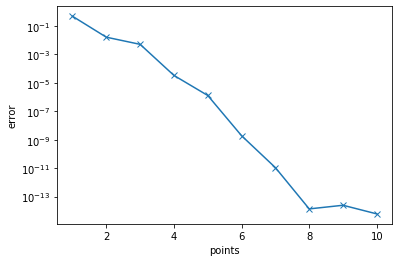

In [29]:
plt.yscale("log")
plt.xlabel("points")
plt.ylabel("error")
plt.plot (range(1,len(errors)+1), errors, "-x")

In [30]:
def func(x):
    return sin(x)

In [ ]:
pts = [0, pi/2, pi]
x = np.linspace(0, 2*pi, 100)
newton_interpol = NewtonInterpol(pts, x)
plt. plot(x, newton_interpol)